
[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Initial Dataset:
     Education Marital_Status     Income  Kidhome  Teenhome Dt_Customer  \
0      Master         Single  491796.22        1         0  2013-12-26   
1      Master        Married  513926.78        1         0  2014-05-04   
2  Graduation          Alone  521309.22        2         2  2013-02-15   
3         PhD           YOLO  231628.91        1         0  2013-06-12   
4    2n Cycle       Divorced  223936.10        1         1  2013-05-30   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  Response  Age  \
0       31      1364         72             1129  ...         1   44   
1       23      1275         94              455  ...         1   48   
2       93        62        127              530  ...         1   50   
3       13       251         87             1153  ...         0  111   
4       65       670         10              650  ...         0   91   

     Age_Group  Gen_Group  DaysAsCustomer  NumChildren  NumAcceptedCmp  \
0   Late Adult      Gen X     

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15916\3516285537.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_response_rates.index, y=cluster_response_rates.values, palette='viridis')


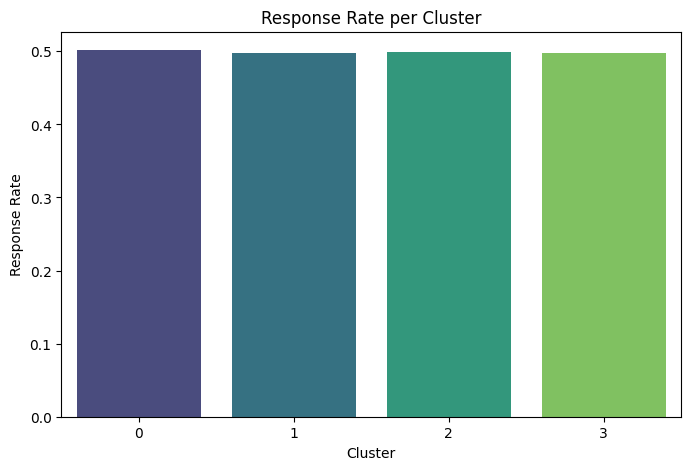


Classification Report (Cluster → Response):
              precision    recall  f1-score   support

           0       0.50      0.75      0.60     10048
           1       0.50      0.25      0.34     10008

    accuracy                           0.50     20056
   macro avg       0.50      0.50      0.47     20056
weighted avg       0.50      0.50      0.47     20056



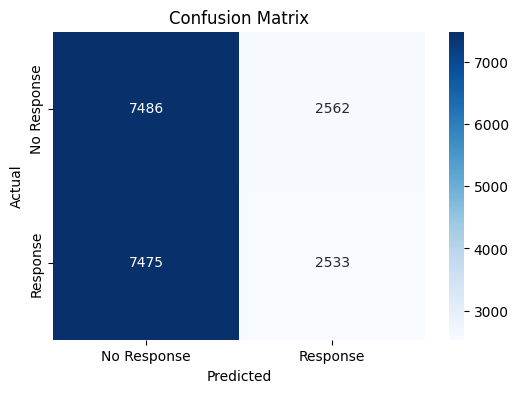

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 16390, ncost: 6398993.210071224
Run: 1, iteration: 2/100, moves: 5921, ncost: 6210312.702470971
Run: 1, iteration: 3/100, moves: 1809, ncost: 6174570.4872206105
Run: 1, iteration: 4/100, moves: 1393, ncost: 6155136.606696997
Run: 1, iteration: 5/100, moves: 0, ncost: 6155136.606696997
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 29656, ncost: 7230761.284588759
Run: 2, iteration: 2/100, moves: 11367, ncost: 6437834.572993823
Run: 2, iteration: 3/100, moves: 4284, ncost: 6277517.036196291
Run: 2, iteration: 4/100, moves: 2308, ncost: 6224682.583340273
Run: 2, iteration: 5/100, moves: 2231, ncost: 6184237.237064759
Run: 2, iteration: 6/100, moves: 591, ncost: 6180576.502097463
Run: 2, iteration: 7/100, moves: 0, ncost: 6180576.502097463
Init: initializing centroids
Init: initializing clusters
Starting iteration

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15916\3516285537.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette='viridis')


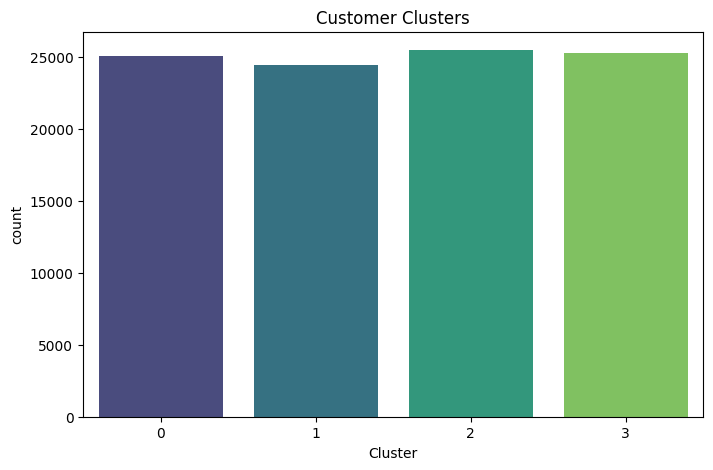


Cluster Characteristics:
          Education  Marital_Status    Income   Recency  AcceptedCmp3  \
Cluster                                                                
0         1.998127        3.503049  0.500277  0.501011      0.504125   
1         1.999836        3.498343  0.496859  0.498087      0.503212   
2         2.001883        3.514376  0.496854  0.501671      0.503942   
3         1.992835        3.500594  0.501570  0.499274      0.497308   

         AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
Cluster                                                                     
0            0.500897      0.499263      0.498784      0.497509  0.499781   
1            0.503581      0.501575      0.498220      0.502435  0.502803   
2            0.495587      0.502138      0.498843      0.504217  0.497156   
3            0.502138      0.500515      0.495962      0.503365  0.498694   

         ...         Age  Age_Group  Gen_Group  DaysAsCustomer  NumChildren  

In [1]:
# Install necessary package
!pip install kmodes

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from kmodes.kprototypes import KPrototypes

# ---------------- STEP 1: LOAD DATA ----------------
df = pd.read_csv("Marketing_Campaign_Dataset.csv")
print("Initial Dataset:\n", df.head())

# ---------------- STEP 2: DATA CLEANING ----------------
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Numerical -> Median
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df.mode().iloc[0])  # Categorical -> Mode

# ---------------- STEP 3: FEATURE ENGINEERING ----------------
# Create new features
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df['Engagement_Score'] = df['NumWebVisitsMonth'] + df['NumDealsPurchases']

# Drop irrelevant columns
drop_cols = ['Dt_Customer', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

df.drop(columns=drop_cols, inplace=True)

# Encode categorical variables
categorical_columns = ['Education', 'Marital_Status', 'Age_Group', 'Gen_Group']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# ---------------- STEP 4: OUTLIER HANDLING ----------------
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

numerical_cols = ['Income', 'Recency', 'Total_Spending', 'Total_Purchases', 
                  'Engagement_Score', 'DaysAsCustomer', 'NumAcceptedCmp', 'Conversion_Rate']

for col in numerical_cols:
    cap_outliers(df, col)

# ---------------- STEP 5: FEATURE SCALING ----------------
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# ---------------- STEP 6: TRAIN-TEST SPLIT ----------------
X = df.drop(columns=['Response'])  # Features
y = df['Response']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# ---------------- STEP 7: K-PROTOTYPES CLUSTERING ----------------
cat_cols_idx = [X_train.columns.get_loc(col) for col in categorical_columns]  # Categorical column indices

# Apply K-Prototypes clustering
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42, verbose=1)
clusters_train = kproto.fit_predict(X_train, categorical=cat_cols_idx)

# Assign cluster labels
X_train['Cluster'] = clusters_train

# ---------------- STEP 8: CLUSTER ANALYSIS ----------------
# Merge clusters with Response for analysis
train_cluster_analysis = X_train.copy()
train_cluster_analysis['Response'] = y_train

# Analyze response rate per cluster
cluster_response_rates = train_cluster_analysis.groupby("Cluster")["Response"].mean()
print("\nResponse Rate per Cluster (Train Set):\n", cluster_response_rates)

# Visualize response rates
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_response_rates.index, y=cluster_response_rates.values, palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Response Rate")
plt.title("Response Rate per Cluster")
plt.show()

# ---------------- STEP 9: CLUSTER PREDICTION ON TEST SET ----------------
clusters_test = kproto.predict(X_test, categorical=cat_cols_idx)

# ---------------- STEP 10: CLASSIFICATION ANALYSIS ----------------
# Train a classifier to check if clusters predict response well
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train[['Cluster']], y_train)

# Predict response using clusters
y_pred = clf.predict(pd.DataFrame(clusters_test, columns=['Cluster']))

# Classification report
print("\nClassification Report (Cluster → Response):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Response', 'Response'], yticklabels=['No Response', 'Response'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------- STEP 11: CLUSTER VISUALIZATION ----------------
# Apply K-Prototypes clustering on full dataset
cat_cols_idx = [df.columns.get_loc(col) for col in categorical_columns]
clusters = kproto.fit_predict(df, categorical=cat_cols_idx)
df['Cluster'] = clusters

# Visualize cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title("Customer Clusters")
plt.show()

# Display cluster characteristics
print("\nCluster Characteristics:\n", df.groupby("Cluster").mean())
